# Lesson 3. Second-order Linear Ordinary Differential Equations
## Companion Notebook — Examples & Visualizations

**Topics covered:**
1. Homogeneous Constant Coefficient Equations (3 cases)
2. Variation of Parameters
3. Euler (Cauchy–Euler) Equations
4. Initial Value Problems
5. Taylor Series Solutions
6. Boundary Value Problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

---
## 1. Homogeneous Constant Coefficient Equations

Consider the equation
$$y'' + a_1 y' + a_0 y = 0.$$

Substituting $y = e^{\lambda x}$ leads to the **characteristic equation**:
$$\lambda^2 + a_1 \lambda + a_0 = 0.$$

| Roots | General Solution |
|---|---|
| $\lambda_1 \neq \lambda_2$ (real) | $y = C_1 e^{\lambda_1 x} + C_2 e^{\lambda_2 x}$ |
| $\lambda_1 = \lambda_2 = \lambda$ | $y = (C_1 + C_2 x) e^{\lambda x}$ |
| $\lambda = \alpha \pm i\beta$ | $y = e^{\alpha x}(C_1 \cos\beta x + C_2 \sin\beta x)$ |

### Example 1: Distinct Real Roots — $y'' + y' - 6y = 0$

Characteristic equation: $\lambda^2 + \lambda - 6 = 0 \Rightarrow \lambda_1 = 2,\; \lambda_2 = -3$

General solution: $y = C_1 e^{2x} + C_2 e^{-3x}$

Characteristic equation: lambda**2 + lambda - 6 = 0
Roots: [-3, 2]


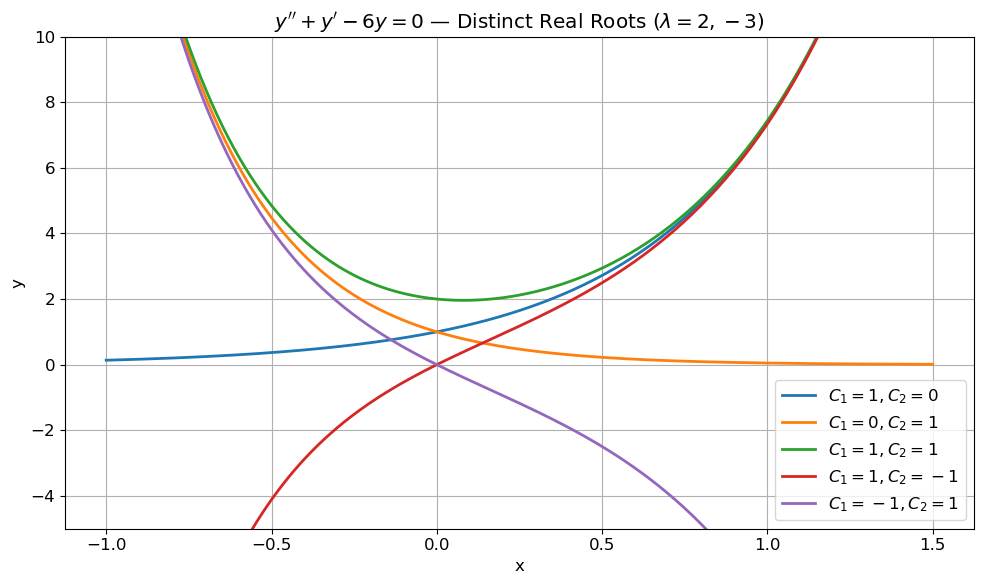

In [2]:
# Characteristic equation: lambda^2 + lambda - 6 = 0
lam = sp.Symbol('lambda')
char_eq = lam**2 + lam - 6
roots = sp.solve(char_eq, lam)
print(f"Characteristic equation: {char_eq} = 0")
print(f"Roots: {roots}")

x = np.linspace(-1, 1.5, 300)

fig, ax = plt.subplots(figsize=(10, 6))
for C1, C2 in [(1, 0), (0, 1), (1, 1), (1, -1), (-1, 1)]:
    y = C1 * np.exp(2*x) + C2 * np.exp(-3*x)
    ax.plot(x, y, linewidth=2, label=f'$C_1={C1}, C_2={C2}$')

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$y'' + y' - 6y = 0$ — Distinct Real Roots ($\lambda=2, -3$)")
ax.set_ylim(-5, 10)
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

### Example 2: Repeated Roots — $4y'' + 12y' + 9y = 0$

Characteristic equation: $4\lambda^2 + 12\lambda + 9 = (2\lambda + 3)^2 = 0 \Rightarrow \lambda = -\tfrac{3}{2}$

General solution: $y = (C_1 + C_2 x) e^{-3x/2}$

Characteristic equation: 4*lambda**2 + 12*lambda + 9 = 0
Roots: [-3/2] (repeated)


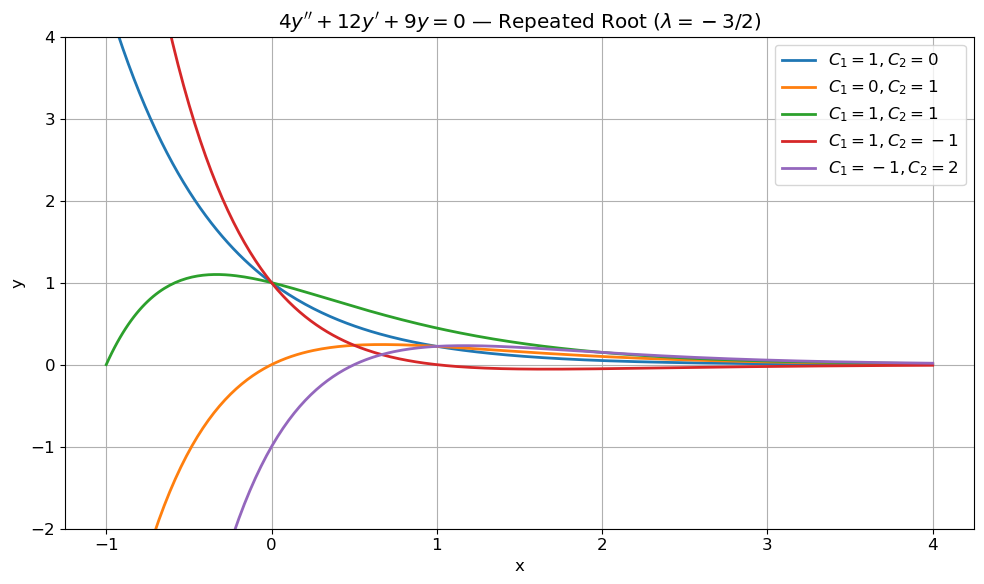

In [3]:
char_eq2 = 4*lam**2 + 12*lam + 9
roots2 = sp.solve(char_eq2, lam)
print(f"Characteristic equation: {char_eq2} = 0")
print(f"Roots: {roots2} (repeated)")

x = np.linspace(-1, 4, 300)

fig, ax = plt.subplots(figsize=(10, 6))
for C1, C2 in [(1, 0), (0, 1), (1, 1), (1, -1), (-1, 2)]:
    y = (C1 + C2 * x) * np.exp(-1.5 * x)
    ax.plot(x, y, linewidth=2, label=f'$C_1={C1}, C_2={C2}$')

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$4y'' + 12y' + 9y = 0$ — Repeated Root ($\lambda = -3/2$)")
ax.set_ylim(-2, 4)
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

### Example 3: Complex Roots — $y'' - 6y' + 13y = 0$

Characteristic equation: $\lambda^2 - 6\lambda + 13 = 0 \Rightarrow \lambda = 3 \pm 2i$

General solution: $y = e^{3x}(C_1 \cos 2x + C_2 \sin 2x)$

Characteristic equation: lambda**2 - 6*lambda + 13 = 0
Roots: [3 - 2*I, 3 + 2*I]


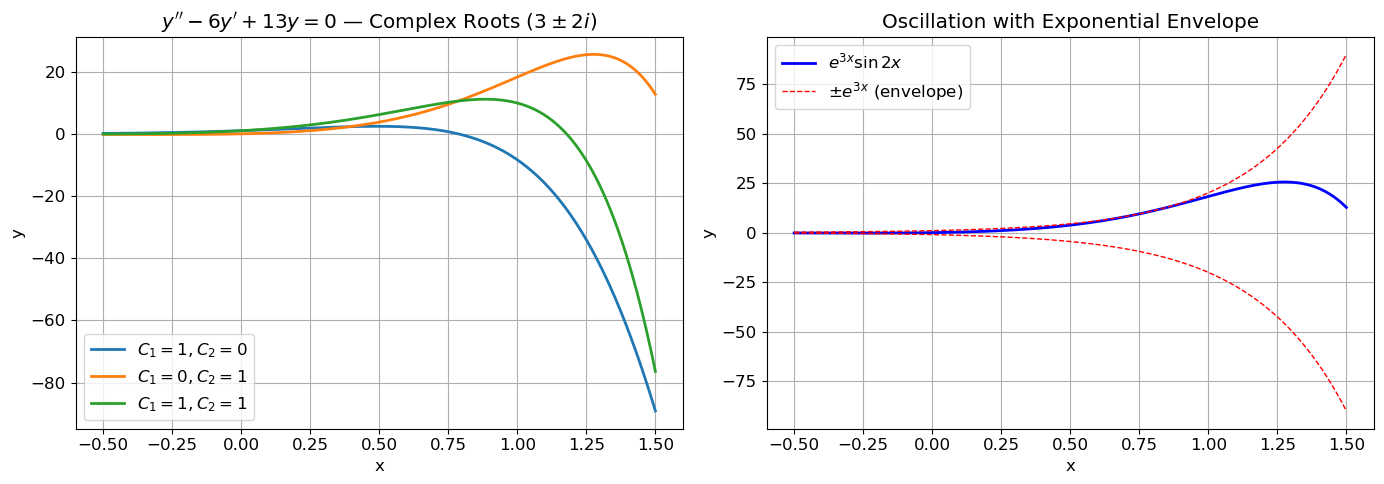

In [4]:
char_eq3 = lam**2 - 6*lam + 13
roots3 = sp.solve(char_eq3, lam)
print(f"Characteristic equation: {char_eq3} = 0")
print(f"Roots: {roots3}")

alpha, beta = 3, 2
x = np.linspace(-0.5, 1.5, 300)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for C1, C2 in [(1, 0), (0, 1), (1, 1)]:
    y = np.exp(alpha*x) * (C1*np.cos(beta*x) + C2*np.sin(beta*x))
    axes[0].plot(x, y, linewidth=2, label=f'$C_1={C1}, C_2={C2}$')
axes[0].set_xlabel('x'); axes[0].set_ylabel('y')
axes[0].set_title(r"$y'' - 6y' + 13y = 0$ — Complex Roots ($3 \pm 2i$)")
axes[0].legend(); axes[0].grid(True)

# Envelope
y_env = np.exp(alpha*x)
y_osc = np.exp(alpha*x) * np.sin(beta*x)
axes[1].plot(x, y_osc, 'b-', linewidth=2, label=r'$e^{3x}\sin 2x$')
axes[1].plot(x, y_env, 'r--', linewidth=1, label=r'$\pm e^{3x}$ (envelope)')
axes[1].plot(x, -y_env, 'r--', linewidth=1)
axes[1].set_xlabel('x'); axes[1].set_ylabel('y')
axes[1].set_title('Oscillation with Exponential Envelope')
axes[1].legend(); axes[1].grid(True)

plt.tight_layout()
plt.show()

---
## 2. Variation of Parameters

For the nonhomogeneous equation $y'' + a_1 y' + a_0 y = f(x)$:

1. Find the complementary solution $y_c = C_1 y_1 + C_2 y_2$
2. Compute the Wronskian: $W(y_1, y_2) = y_1 y_2' - y_2 y_1'$
3. Particular solution:
$$y_p = y_2 \int \frac{y_1 f}{W} \, dx - y_1 \int \frac{y_2 f}{W} \, dx$$

### Example 1: $y'' + y = \tan(x)$, $0 < x < \pi/2$

In [5]:
x_s = sp.Symbol('x')

# Complementary solution: y'' + y = 0 => y1 = sin(x), y2 = cos(x)
y1 = sp.sin(x_s)
y2 = sp.cos(x_s)
f_rhs = sp.tan(x_s)

# Wronskian
W = y1 * sp.diff(y2, x_s) - y2 * sp.diff(y1, x_s)
W_simplified = sp.simplify(W)
print(f"Wronskian W(sin x, cos x) = {W_simplified}")

# Variation of parameters
integral1 = sp.integrate(y1 * f_rhs / W_simplified, x_s)
integral2 = sp.integrate(y2 * f_rhs / W_simplified, x_s)

y_p = sp.simplify(y2 * integral1 - y1 * integral2)
print(f"\nParticular solution: y_p = {y_p}")
print(f"General solution: y = C1*sin(x) + C2*cos(x) + {y_p}")

Wronskian W(sin x, cos x) = -1



Particular solution: y_p = (log(sin(x) - 1) - log(sin(x) + 1))*cos(x)/2
General solution: y = C1*sin(x) + C2*cos(x) + (log(sin(x) - 1) - log(sin(x) + 1))*cos(x)/2


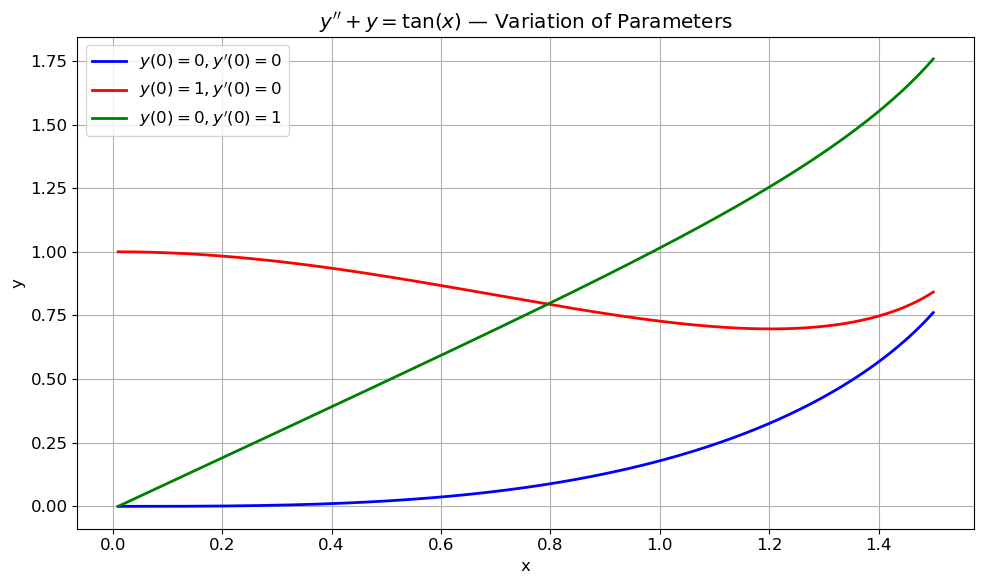

In [6]:
# Plot: numerical solution vs analytical
# Convert 2nd-order to system: y1' = y2, y2' = -y1 + tan(x)
def ode_tan(x, Y):
    return [Y[1], -Y[0] + np.tan(x)]

x_plot = np.linspace(0.01, 1.5, 300)

fig, ax = plt.subplots(figsize=(10, 6))
for y0, yp0, color, label in [(0, 0, 'blue', '$y(0)=0, y\'(0)=0$'),
                                (1, 0, 'red', '$y(0)=1, y\'(0)=0$'),
                                (0, 1, 'green', '$y(0)=0, y\'(0)=1$')]:
    sol = solve_ivp(ode_tan, [0.01, 1.5], [y0, yp0], dense_output=True, rtol=1e-10)
    ax.plot(x_plot, sol.sol(x_plot)[0], color=color, linewidth=2, label=label)

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$y'' + y = \tan(x)$ — Variation of Parameters")
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

### Example 2: $y'' + 3y' + 2y = \sin(e^x)$

Wronskian: -exp(-3*x)


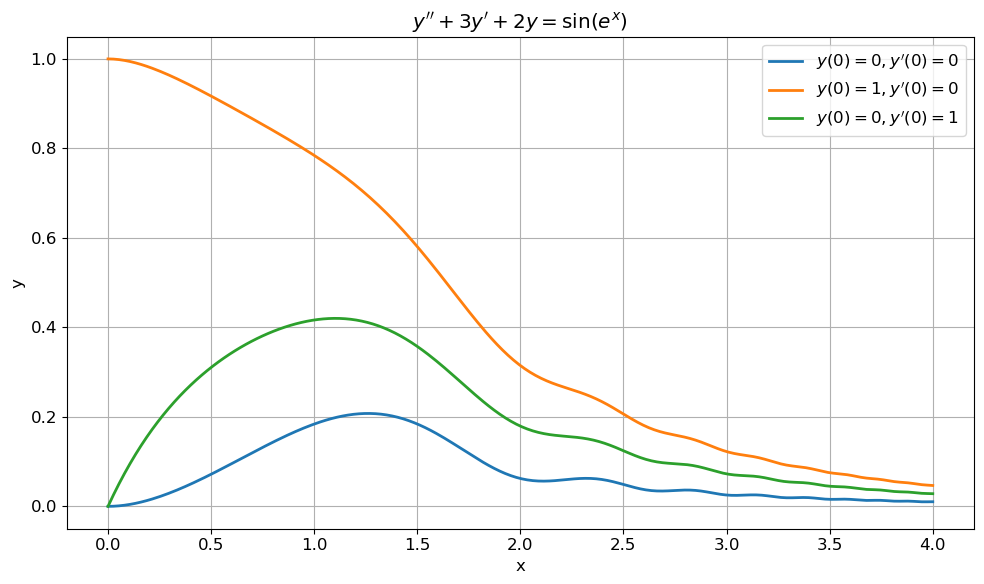

In [7]:
# Complementary: lambda^2 + 3*lambda + 2 = 0 => lambda = -1, -2
y1_2 = sp.exp(-x_s)
y2_2 = sp.exp(-2*x_s)
f_rhs2 = sp.sin(sp.exp(x_s))

W2 = sp.simplify(y1_2 * sp.diff(y2_2, x_s) - y2_2 * sp.diff(y1_2, x_s))
print(f"Wronskian: {W2}")

# Numerical solution and plot
def ode_sinex(x, Y):
    return [Y[1], -3*Y[1] - 2*Y[0] + np.sin(np.exp(x))]

x_plot = np.linspace(0, 4, 300)

fig, ax = plt.subplots(figsize=(10, 6))
for y0, yp0, label in [(0, 0, '$y(0)=0, y\'(0)=0$'),
                        (1, 0, '$y(0)=1, y\'(0)=0$'),
                        (0, 1, '$y(0)=0, y\'(0)=1$')]:
    sol = solve_ivp(ode_sinex, [0, 4], [y0, yp0], dense_output=True, rtol=1e-10)
    ax.plot(x_plot, sol.sol(x_plot)[0], linewidth=2, label=label)

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$y'' + 3y' + 2y = \sin(e^x)$")
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

---
## 3. Euler (Cauchy–Euler) Equations

The Euler equation $ax^2 y'' + bxy' + cy = 0$ has the **indicial equation**:
$$ar(r-1) + br + c = 0.$$

| Roots | General Solution on $(0,\infty)$ |
|---|---|
| $r_1 \neq r_2$ (real) | $y = C_1 x^{r_1} + C_2 x^{r_2}$ |
| $r_1 = r_2 = r$ | $y = x^r(C_1 + C_2 \ln x)$ |
| $r = \alpha \pm i\beta$ | $y = x^\alpha(C_1 \cos(\beta \ln x) + C_2 \sin(\beta \ln x))$ |

### Example 1: Distinct Real Roots — $6x^2 y'' + 5xy' - y = 0$

Indicial equation: $6r(r-1) + 5r - 1 = (2r-1)(3r+1) = 0 \Rightarrow r = 1/2, -1/3$

Indicial equation: 6*r**2 - r - 1 = 0
Roots: [-1/3, 1/2]


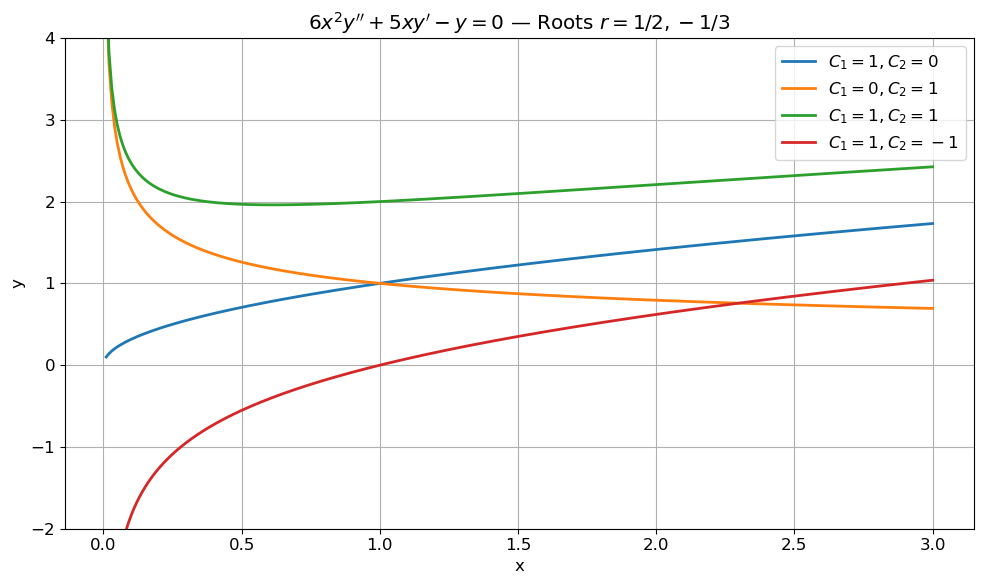

In [8]:
r = sp.Symbol('r')
indicial1 = 6*r*(r-1) + 5*r - 1
roots_e1 = sp.solve(indicial1, r)
print(f"Indicial equation: {sp.expand(indicial1)} = 0")
print(f"Roots: {roots_e1}")

x = np.linspace(0.01, 3, 300)

fig, ax = plt.subplots(figsize=(10, 6))
for C1, C2 in [(1, 0), (0, 1), (1, 1), (1, -1)]:
    y = C1 * x**0.5 + C2 * x**(-1/3)
    ax.plot(x, y, linewidth=2, label=f'$C_1={C1}, C_2={C2}$')

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$6x^2 y'' + 5xy' - y = 0$ — Roots $r = 1/2, -1/3$")
ax.set_ylim(-2, 4)
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

### Example 2: Repeated Roots — $x^2 y'' - 5xy' + 9y = 0$

Indicial equation: $r(r-1) - 5r + 9 = (r-3)^2 = 0 \Rightarrow r = 3$

Indicial equation: r**2 - 6*r + 9 = 0
Roots: [3] (repeated)


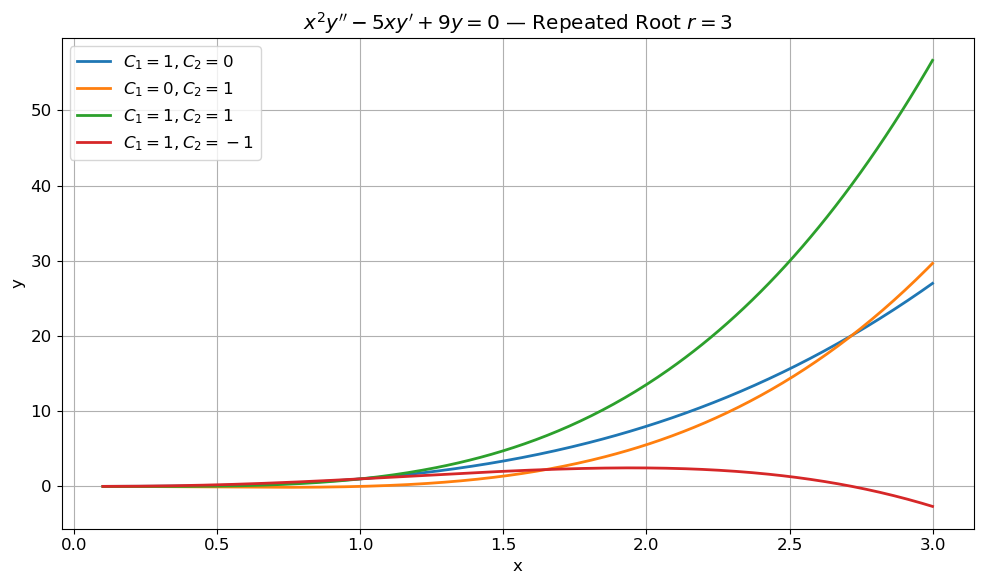

In [9]:
indicial2 = r*(r-1) - 5*r + 9
roots_e2 = sp.solve(indicial2, r)
print(f"Indicial equation: {sp.expand(indicial2)} = 0")
print(f"Roots: {roots_e2} (repeated)")

x = np.linspace(0.1, 3, 300)

fig, ax = plt.subplots(figsize=(10, 6))
for C1, C2 in [(1, 0), (0, 1), (1, 1), (1, -1)]:
    y = x**3 * (C1 + C2 * np.log(x))
    ax.plot(x, y, linewidth=2, label=f'$C_1={C1}, C_2={C2}$')

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$x^2 y'' - 5xy' + 9y = 0$ — Repeated Root $r = 3$")
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

### Example 3: Complex Roots — $x^2 y'' + 3xy' + 2y = 0$

Indicial equation: $r(r-1) + 3r + 2 = (r+1)^2 + 1 = 0 \Rightarrow r = -1 \pm i$

Indicial equation: r**2 + 2*r + 2 = 0
Roots: [-1 - I, -1 + I]


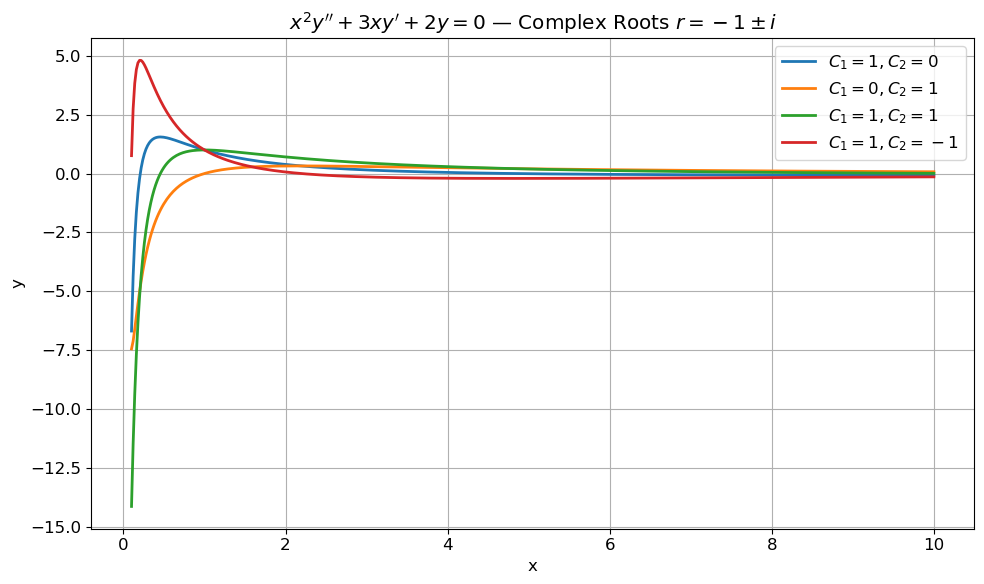

In [10]:
indicial3 = r*(r-1) + 3*r + 2
roots_e3 = sp.solve(indicial3, r)
print(f"Indicial equation: {sp.expand(indicial3)} = 0")
print(f"Roots: {roots_e3}")

alpha_e, beta_e = -1, 1
x = np.linspace(0.1, 10, 500)

fig, ax = plt.subplots(figsize=(10, 6))
for C1, C2 in [(1, 0), (0, 1), (1, 1), (1, -1)]:
    y = x**alpha_e * (C1 * np.cos(beta_e * np.log(x)) + C2 * np.sin(beta_e * np.log(x)))
    ax.plot(x, y, linewidth=2, label=f'$C_1={C1}, C_2={C2}$')

ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$x^2 y'' + 3xy' + 2y = 0$ — Complex Roots $r = -1 \pm i$")
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

---
## 4. Initial Value Problems

### Example 1: $y'' + 6y' + 13y = 0$, $y(0) = 0$, $y'(0) = 2$

Roots: $\lambda = -3 \pm 2i$. General solution: $y = e^{-3x}(c_1 \cos 2x + c_2 \sin 2x)$.

From ICs: $c_1 = 0$, $c_2 = 1$, so $y = e^{-3x} \sin 2x$.

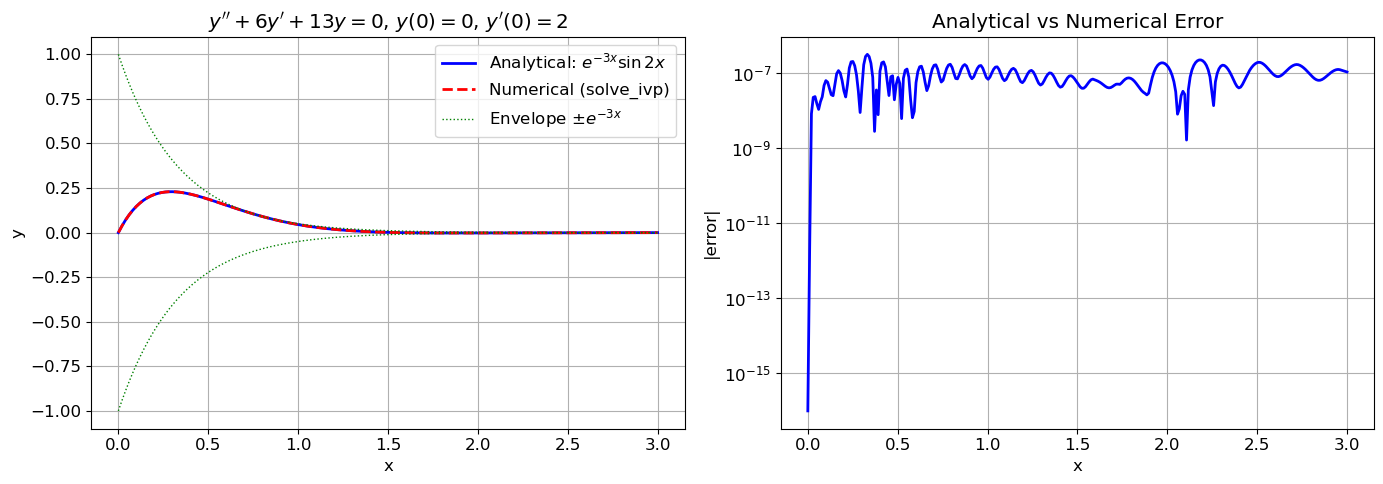

Max error: 3.21e-07


In [11]:
# Analytical solution
x_plot = np.linspace(0, 3, 300)
y_exact_ivp1 = np.exp(-3*x_plot) * np.sin(2*x_plot)

# Numerical verification via solve_ivp
sol_ivp1 = solve_ivp(lambda x, Y: [Y[1], -6*Y[1] - 13*Y[0]],
                      [0, 3], [0, 2], dense_output=True, rtol=1e-12)
y_num_ivp1 = sol_ivp1.sol(x_plot)[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(x_plot, y_exact_ivp1, 'b-', linewidth=2, label='Analytical: $e^{-3x}\\sin 2x$')
axes[0].plot(x_plot, y_num_ivp1, 'r--', linewidth=2, label='Numerical (solve_ivp)')
axes[0].plot(x_plot, np.exp(-3*x_plot), 'g:', linewidth=1, label='Envelope $\\pm e^{-3x}$')
axes[0].plot(x_plot, -np.exp(-3*x_plot), 'g:', linewidth=1)
axes[0].set_xlabel('x'); axes[0].set_ylabel('y')
axes[0].set_title(r"$y'' + 6y' + 13y = 0$, $y(0)=0$, $y'(0)=2$")
axes[0].legend(); axes[0].grid(True)

# Error
axes[1].semilogy(x_plot, np.abs(y_exact_ivp1 - y_num_ivp1) + 1e-16, 'b-', linewidth=2)
axes[1].set_xlabel('x'); axes[1].set_ylabel('|error|')
axes[1].set_title('Analytical vs Numerical Error')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Max error: {np.max(np.abs(y_exact_ivp1 - y_num_ivp1)):.2e}")

### Example 2: Euler IVP — $2x^2 y'' + 3xy' - 15y = 0$, $y(1) = 0$, $y'(1) = 1$

Indicial: $2r(r-1)+3r-15 = (2r-5)(r+3) = 0 \Rightarrow r = 5/2, -3$.

General: $y = c_1 x^{5/2} + c_2 x^{-3}$. From ICs: $c_1 = 2/11$, $c_2 = -2/11$.

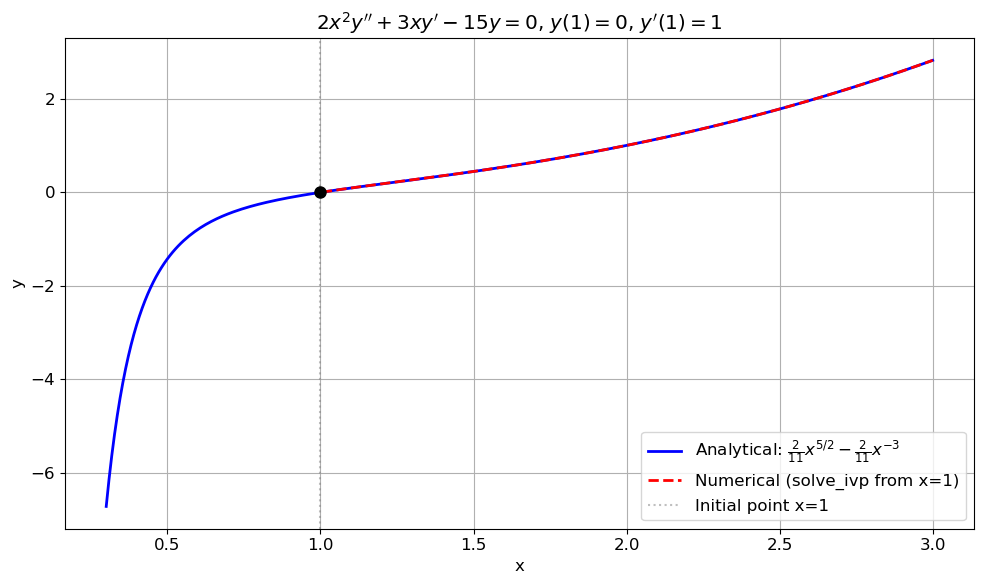

In [12]:
x_plot = np.linspace(0.3, 3, 300)
y_exact_ivp2 = (2/11) * x_plot**(5/2) - (2/11) * x_plot**(-3)

# Numerical: 2x^2 y'' + 3xy' - 15y = 0 => y'' = (15y - 3xy')/(2x^2)
sol_ivp2 = solve_ivp(lambda x, Y: [Y[1], (15*Y[0] - 3*x*Y[1]) / (2*x**2)],
                      [1, 3], [0, 1], dense_output=True, rtol=1e-12)
y_num_ivp2 = sol_ivp2.sol(x_plot[x_plot >= 1])[0]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_plot, y_exact_ivp2, 'b-', linewidth=2, label=r'Analytical: $\frac{2}{11}x^{5/2} - \frac{2}{11}x^{-3}$')
ax.plot(x_plot[x_plot >= 1], y_num_ivp2, 'r--', linewidth=2, label='Numerical (solve_ivp from x=1)')
ax.axvline(x=1, color='gray', linestyle=':', alpha=0.5, label='Initial point x=1')
ax.plot(1, 0, 'ko', markersize=8)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"$2x^2 y'' + 3xy' - 15y = 0$, $y(1)=0$, $y'(1)=1$")
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

---
## 5. Taylor Series Solutions of IVPs

For $y'' = g(x, y, y')$ with $y(x_0) = y_0$, $y'(x_0) = y_0'$:

$$y(x) = y_0 + (x-x_0) y_0' + \frac{(x-x_0)^2}{2!} y_0'' + \frac{(x-x_0)^3}{3!} y_0''' + \cdots$$

Higher derivatives are found by successive differentiation of the ODE.

### Example 1: $y'' - 2xy' + x^2 y = 0$, $y(0) = 1$, $y'(0) = -1$ (degree 4)

Successive differentiation of y'' = 2xy' - x²y:
  y(0)     = 1
  y'(0)    = -1
  y''(0)   = 0
  y'''(0)  = -2
  y''''(0) = -2

Taylor polynomial: y(x) ≈ 1 - x - x³/3 - x⁴/12


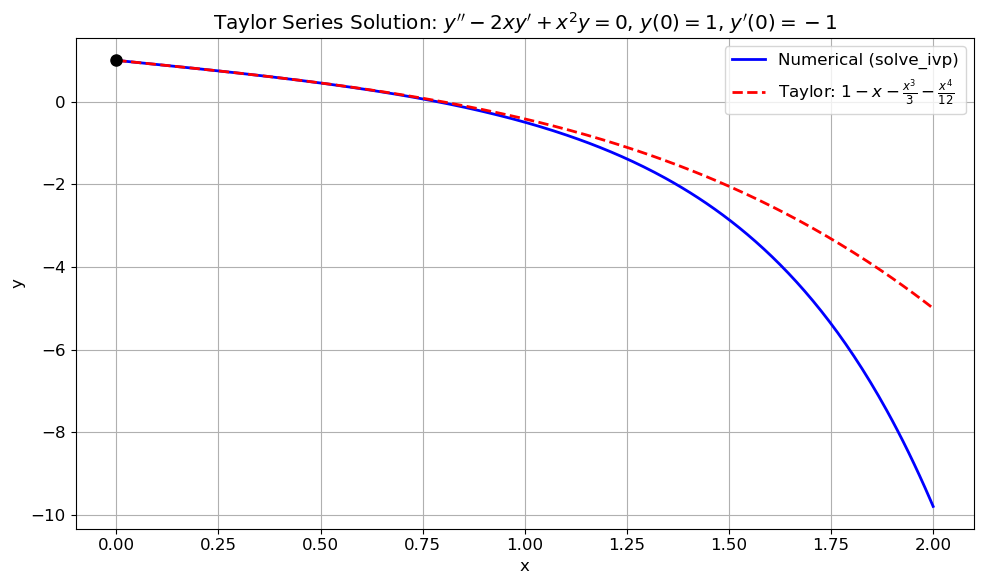

In [13]:
# Compute derivatives at x=0 by successive differentiation
# y'' = 2xy' - x^2 y
y0, yp0 = 1, -1

# y''(0) = 2*0*(-1) - 0^2*1 = 0
ypp0 = 2*0*yp0 - 0**2*y0

# y''' = 2y' + 2xy'' - 2xy - x^2 y'
# y'''(0) = 2(-1) + 0 - 0 - 0 = -2
yppp0 = 2*yp0 + 2*0*ypp0 - 2*0*y0 - 0**2*yp0

# y^(4) = 4y'' + 2xy''' - 2y - 4xy' - x^2 y''
# y^(4)(0) = 0 + 0 - 2 - 0 - 0 = -2
y4_0 = 4*ypp0 + 2*0*yppp0 - 2*y0 - 4*0*yp0 - 0**2*ypp0

print("Successive differentiation of y'' = 2xy' - x²y:")
print(f"  y(0)     = {y0}")
print(f"  y'(0)    = {yp0}")
print(f"  y''(0)   = {ypp0}")
print(f"  y'''(0)  = {yppp0}")
print(f"  y''''(0) = {y4_0}")

# Taylor polynomial
x_vals = np.linspace(-1, 2, 300)
taylor_p = y0 + yp0*x_vals + ypp0/2*x_vals**2 + yppp0/6*x_vals**3 + y4_0/24*x_vals**4

# Numerical reference: y'' = 2xy' - x^2 y
sol_ts1 = solve_ivp(lambda x, Y: [Y[1], 2*x*Y[1] - x**2*Y[0]],
                     [-1, 2], [1*np.exp(0) + (-1)*(-1) + 0, -1 + 2*(-1)*(-1) - (-1)**2*1],
                     dense_output=True, rtol=1e-12)
# Easier: solve from x=0
sol_ts1 = solve_ivp(lambda x, Y: [Y[1], 2*x*Y[1] - x**2*Y[0]],
                     [0, 2], [1, -1], dense_output=True, rtol=1e-12)
x_num = np.linspace(0, 2, 300)
y_num = sol_ts1.sol(x_num)[0]

print(f"\nTaylor polynomial: y(x) ≈ 1 - x - x³/3 - x⁴/12")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_num, y_num, 'b-', linewidth=2, label='Numerical (solve_ivp)')
x_taylor = np.linspace(0, 2, 300)
y_taylor = 1 - x_taylor - x_taylor**3/3 - x_taylor**4/12
ax.plot(x_taylor, y_taylor, 'r--', linewidth=2, label=r'Taylor: $1 - x - \frac{x^3}{3} - \frac{x^4}{12}$')
ax.plot(0, 1, 'ko', markersize=8)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"Taylor Series Solution: $y'' - 2xy' + x^2 y = 0$, $y(0)=1$, $y'(0)=-1$")
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

### Example 2: $y'' + xy = 0$, $y(0) = 0$, $y'(0) = 1$ (degree 5)

This is related to the **Airy equation**.

Successive differentiation of y'' = -xy:
  y(0)      = 0
  y'(0)     = 1
  y''(0)    = 0
  y'''(0)   = 0
  y''''(0)  = -2
  y'''''(0) = 0

Taylor polynomial: y(x) ≈ x - x⁴/12


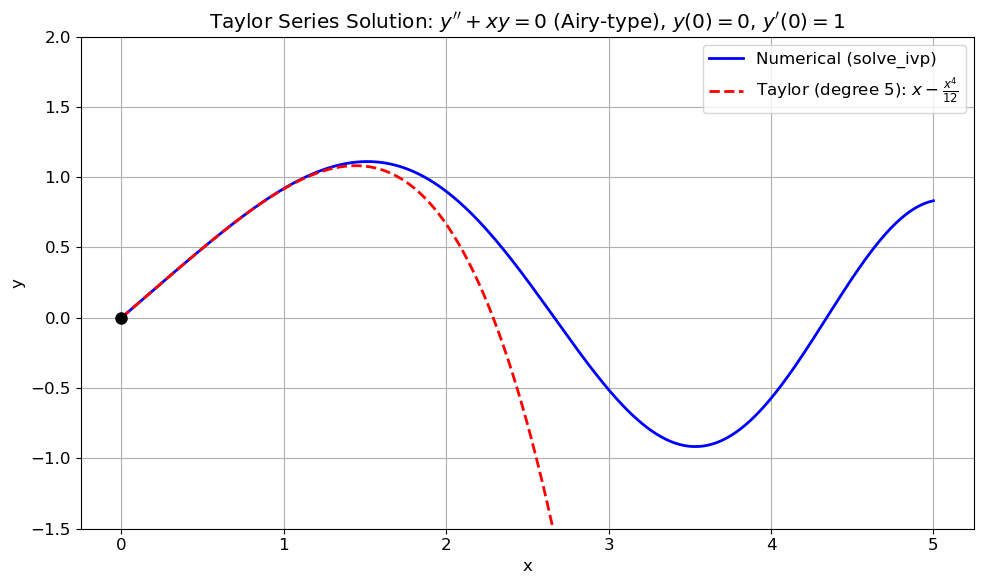

In [14]:
# y'' = -xy
# y(0)=0, y'(0)=1
y0, yp0 = 0, 1
ypp0 = -0*y0           # = 0
# y''' = -y - xy'
yppp0 = -y0 - 0*yp0    # = 0
# y^(4) = -2y' - xy''
y4_0 = -2*yp0 - 0*ypp0 # = -2
# y^(5) = -3y'' - xy'''
y5_0 = -3*ypp0 - 0*yppp0 # = 0

print("Successive differentiation of y'' = -xy:")
print(f"  y(0)      = {y0}")
print(f"  y'(0)     = {yp0}")
print(f"  y''(0)    = {ypp0}")
print(f"  y'''(0)   = {yppp0}")
print(f"  y''''(0)  = {y4_0}")
print(f"  y'''''(0) = {y5_0}")

print(f"\nTaylor polynomial: y(x) ≈ x - x⁴/12")

# Numerical reference
sol_ts2 = solve_ivp(lambda x, Y: [Y[1], -x*Y[0]],
                     [0, 5], [0, 1], dense_output=True, rtol=1e-12)

x_num = np.linspace(0, 5, 500)
y_num = sol_ts2.sol(x_num)[0]

x_taylor = np.linspace(0, 3, 300)
y_taylor = x_taylor - x_taylor**4 / 12

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_num, y_num, 'b-', linewidth=2, label='Numerical (solve_ivp)')
ax.plot(x_taylor, y_taylor, 'r--', linewidth=2, label=r'Taylor (degree 5): $x - \frac{x^4}{12}$')
ax.plot(0, 0, 'ko', markersize=8)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.set_title(r"Taylor Series Solution: $y'' + xy = 0$ (Airy-type), $y(0)=0$, $y'(0)=1$")
ax.set_ylim(-1.5, 2)
ax.legend(); ax.grid(True)
plt.tight_layout()
plt.show()

---
## 6. Boundary Value Problems

A **BVP** for $y'' + a_1 y' + a_0 y = f(x)$ on $[a,b]$ specifies conditions at **both endpoints**, e.g. $y(a) = \alpha$, $y(b) = \beta$.

Unlike IVPs, BVPs may have a **unique solution**, **no solution**, or **infinitely many solutions**.

### Example 1: Unique Solution — $y'' + y = 1$, $y(0) = 0$, $y(\pi/2) = 0$

General solution: $y = 1 + c_1 \sin x + c_2 \cos x$.
BCs give $c_2 = -1$, $c_1 = -1$: unique solution $y = 1 - \sin x - \cos x$.

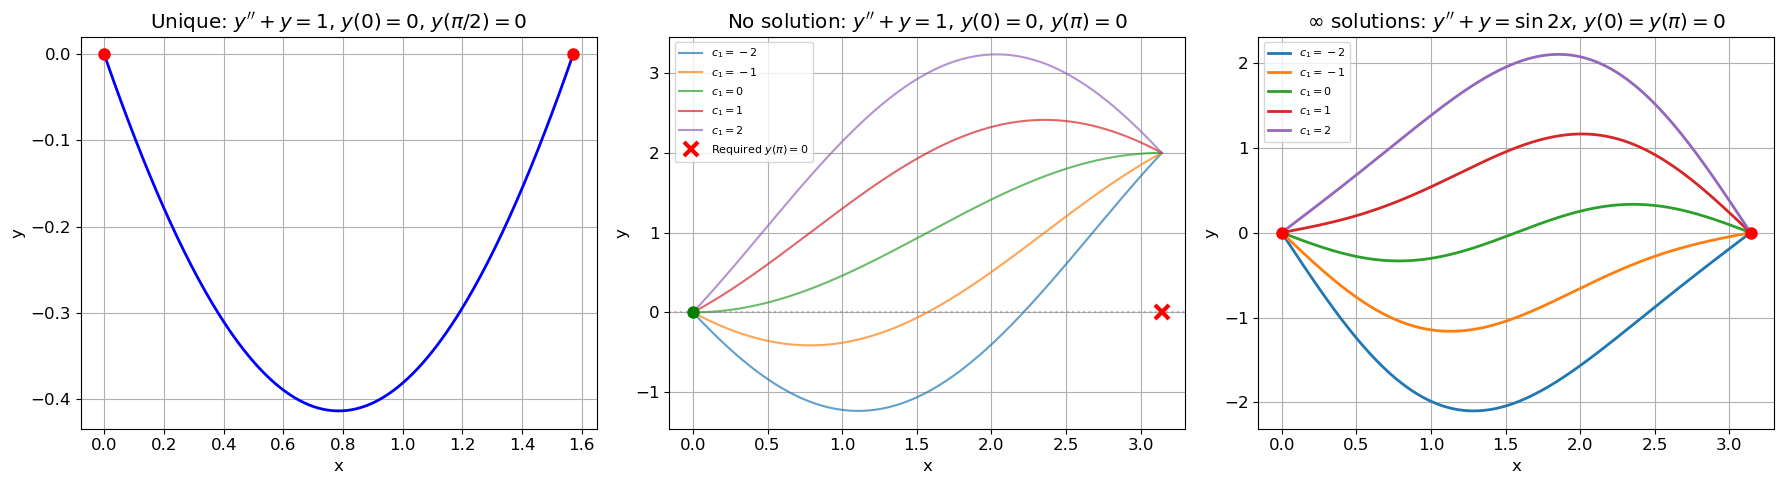

BVP Example 1: UNIQUE solution y = 1 - sin(x) - cos(x)
BVP Example 2: NO solution (y(0)=0 requires c2=-1, but y(π)=0 requires c2=+1)
BVP Example 3: INFINITELY MANY solutions y = -sin(2x)/3 + c1*sin(x) for any c1


In [15]:
x = np.linspace(0, np.pi/2, 200)
y_bvp1 = 1 - np.sin(x) - np.cos(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Example 1: Unique solution
axes[0].plot(x, y_bvp1, 'b-', linewidth=2)
axes[0].plot([0, np.pi/2], [0, 0], 'ro', markersize=8)
axes[0].set_xlabel('x'); axes[0].set_ylabel('y')
axes[0].set_title(r"Unique: $y''+y=1$, $y(0)=0$, $y(\pi/2)=0$")
axes[0].grid(True)

# Example 2: No solution
x2 = np.linspace(0, np.pi, 200)
for c1 in [-2, -1, 0, 1, 2]:
    # y(0) = 0 => c2 = -1
    y_try = 1 + c1*np.sin(x2) - np.cos(x2)
    axes[1].plot(x2, y_try, linewidth=1.5, alpha=0.7, label=f'$c_1={c1}$')
axes[1].axhline(y=0, color='gray', linestyle=':', alpha=0.5)
axes[1].plot(0, 0, 'go', markersize=8)
axes[1].plot(np.pi, 0, 'rx', markersize=10, markeredgewidth=3, label='Required $y(\\pi)=0$')
axes[1].set_xlabel('x'); axes[1].set_ylabel('y')
axes[1].set_title(r"No solution: $y''+y=1$, $y(0)=0$, $y(\pi)=0$")
axes[1].legend(fontsize=8); axes[1].grid(True)

# Example 3: Infinitely many solutions
x3 = np.linspace(0, np.pi, 200)
for c1 in [-2, -1, 0, 1, 2]:
    y_inf = -np.sin(2*x3)/3 + c1*np.sin(x3)
    axes[2].plot(x3, y_inf, linewidth=2, label=f'$c_1={c1}$')
axes[2].plot([0, np.pi], [0, 0], 'ro', markersize=8)
axes[2].set_xlabel('x'); axes[2].set_ylabel('y')
axes[2].set_title(r"$\infty$ solutions: $y''+y=\sin 2x$, $y(0)=y(\pi)=0$")
axes[2].legend(fontsize=8); axes[2].grid(True)

plt.tight_layout()
plt.show()

print("BVP Example 1: UNIQUE solution y = 1 - sin(x) - cos(x)")
print("BVP Example 2: NO solution (y(0)=0 requires c2=-1, but y(π)=0 requires c2=+1)")
print("BVP Example 3: INFINITELY MANY solutions y = -sin(2x)/3 + c1*sin(x) for any c1")

---
## 7. Exercises

**Exercise 1.** Solve $y'' - 4y' + 4y = 0$ (repeated roots). Plot the general solution for several choices of $C_1, C_2$.

**Exercise 2.** Use variation of parameters to solve $y'' + y = \sec(x)$ on $(0, \pi/2)$. Verify numerically.

**Exercise 3.** Find the general solution of the Euler equation $x^2 y'' + xy' + 4y = 0$ on $(0, \infty)$ (complex roots). Plot the oscillatory behavior.

**Exercise 4.** Compute the degree-6 Taylor polynomial for $y'' + x^2 y = 0$, $y(0) = 1$, $y'(0) = 0$. Compare with `solve_ivp` on $[0, 3]$.

**Exercise 5.** For the BVP $y'' + 4y = 0$, $y(0) = 0$, $y(L) = 0$, determine the values of $L > 0$ for which:
- (a) a unique solution exists,
- (b) no solution exists,
- (c) infinitely many solutions exist.

In [16]:
# Space for your solutions
